# Tarea 1 - Análisis de Tensiones en Zapata

**Estudiante:** Oscar Rincón

**Profesor:** Juan David Gomez

**Curso:** Introducción al Método de Elementos Finitos


Se analizan diferentes casos de cargas aplicadas sobre una zapata. Las cargas corresponden entonces a las reacciones vertical, horizontal y de momento $P$, $V$ y $M$ y son:

1. ($P$=1000.0, $V$=0.0 y $M$=0.0) ⇒ ($P_1$=-500.0, $P_2$=-500.0, $V_1$=0.0, $V_2$=0.0)
2. ($P$=0.0, $V$=1000.0 y $M$=0.0) ⇒ ($P_1$=0.0, $P_2$=0.0, $V_1$=500.0, $V_2$=500.0) 
3. ($P$=0.0, $V$=0.0  y $M$=1000.0) ⇒ ($P_1$=-2000.0, $P_2$=2000.0, $V_1$=0.0, $V_2$=0.0) 
4. ($P$=1000.0, $V$=1000.0  y $M$=1000.0) ⇒ ($P_1$=-2500.0, $P_2$=2000.0, $V_1$=500.0, $V_2$=0.0) 


En cada caso se obtienen los $\sigma_{xx}$, $\sigma_{zz}$ y $\tau_{xz}$ en las coordenadas:

- ($x$,$z$)=(5 m, 0 m)
- ($x$,$z$)=(5 m, -7 m) 
- ($x$,$z$)=(5 m, 7 m)

También se comparan los efectos de los estratos en los mapas de tensiones.

###  Librerías requeridas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import solidspy.postprocesor as pos 
import aux_functions as aux
import math

### 2.  Funciones para análisis de tensiones

In [2]:
def modelos(P1,P2,V1,V2,id_model,id_estrato):
    if id_model == 0: # Condicional para modelo de zapata
        nodes , mats, elements, loads, UG , UC , S_nodes, E_nodes \
              , eles = aux.zapata( P1 , P2 , V1 , V2,id_estrato)
    else:
        if id_model == 1: # Condicional para modelo de 1 pilote
            nodes, mats, elements, loads, UG , UC , S_nodes, E_nodes \
                 , eles = aux.pilote_1( P1 , P2 , V1 , V2)
        else: # Condicional para modelo de 2 pilotes
            nodes, mats, elements, loads, UG , UC , S_nodes, E_nodes \
                 , eles = aux.pilote_2( P1 , P2 , V1 , V2)
    return nodes , mats, elements, loads, UG , UC , S_nodes, E_nodes, eles

### Ejecución del análisis

In [3]:
"""
Elegir cargas Veticales y Horizontales
"""
P1 = -500 # Carga Vertical 1 (zapata parte izquierda)
P2 = -500 # Carga Vertical 2 (zapata parte derecha)
V1 = 0 # Carga Horizontal 1 (zapata parte izquierda)
V2 = 0 # Carga Horizontal 2 (zapata parte derecha)
"""
Elegir modelo (0, 1 y 2)
"""
id_model = 0   # (0): Zapata (1): 1 pilote (2): 2 pilotes   
"""
Elegir estrato (0 y 1)
"""
id_estrato = 0   # (0): Sin estratos (1): Con estratos    
"""
Correr modelo de Zapata
"""
nodes, mats, elements, loads,\
UG, UC, S_nodes, E_nodes, eles = modelos(P1,P2,V1,V2,id_model,id_estrato) 

In [4]:
"""
Extracción de tensiones 
"""
sig_x  = S_nodes[: , 0] # Tensión normal horizontal (sig_x) 
sig_y  = S_nodes[: , 1] # Tensión normal vertical (sig_y) 
sig_xy = S_nodes[: , 2] # Tensión cortante (sig_xy) 
els = np.vstack((eles[1],# Semi-espacio
                 eles[2],# Estrato 5 completo
                 eles[3],# Estrato 4 completo
                 eles[4],# Estrato 3 completo
                 eles[5],# Estrato 2 completo
                 eles[6],# Estrato 1 completo
                 eles[7]))# Zapata

### Interpretación de Gráficas de Tensiones

/home/oscar/miniconda3/envs/solidspy-env/lib/python3.10/site-packages/solidspy/postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


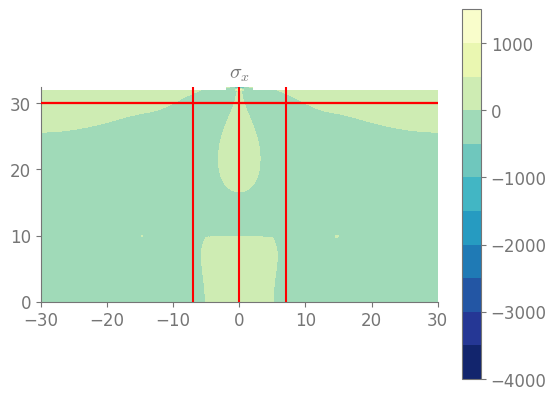

In [5]:
"""
Gráfica de contorno
"""
pos.plot_node_field(sig_x, nodes, els, plt_type="contourf", levels= 10)#Generando gráfica.
plt.title(f"$\sigma_x$") # Añadiendo título de gráfica.
aux.crosshairs(0, 30) # Dibuja línea a 30 en eje y y 0 en eje x.
aux.crosshairs(-7, 30) # Dibuja línea a 30 en eje y y -7 en eje x.
aux.crosshairs(7, 30) # Dibuja línea a 30 en eje y y 7 en eje x.

- De acuedo a la gráfica, en el caso 1 $\sigma_x$ esta entre 0.0 y 500 para ($z$=5.0,$x$=0.0) . 

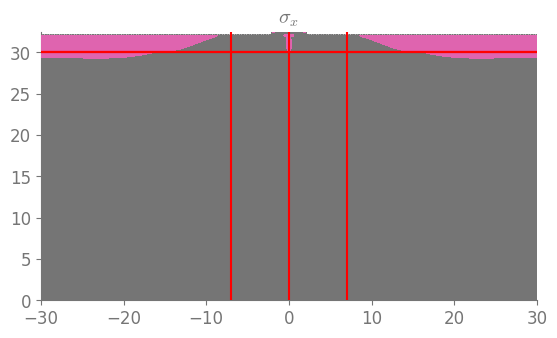

In [6]:
"""
Gráfica de contorno filtrada en ref_val.
"""
ref_val= 10 # Eligiendo valor de referencia.
aux.filtered(nodes, els , sig_x,ref_val)#Generando gráfica.
plt.title(f"$\sigma_x$") # Añadiendo título de gráfica.
aux.crosshairs(0, 30) # Dibuja línea a 30 en eje y y 0 en eje x.
aux.crosshairs(-7, 30) # Dibuja línea a 30 en eje y y -7 en eje x.
aux.crosshairs(7, 30) # Dibuja línea a 30 en eje y y 7 en eje x.

- De acuerdo a la gráfica filtrada el valor de $\sigma_x$ para ($z$=5.0,$x$=0.0) es apróximadamente 10.

- Los valores obtenidos a partir de repetir este procedimientos para cada caso se 
registran en tabla de la siguiente sección.

### Resultados de Análisis de Tensiones SIN Estratos 

|($P$=1000.0, $V$=0.0 y $M$=0.0)| ($z$=5.0,$x$=0.0) | ($z$=5.0,$x$=7.0)| ($z$=5.0,$x$=-7.0)|
|------|-------------------|-------------------|-------------------|
|$\sigma_{xx}$ (Pa)| 10 | -15 | -15  |
|$\sigma_{zz}$ (Pa)|-200 | -5 | -5 |
|$\tau_{xz}$ (Pa)| 0 | 13 | -13 |
|($P$=0.0, $V$=1000.0 y $M$=0.0)|($z$=5.0,$x$=0.0) |($z$=5.0,$x$=7.0)|($z$=5.0,$x$=-7.0)| 
|$\sigma_{xx}$ (Pa)| 0 | -80 | 80 |
|$\sigma_{zz}$ (Pa)| 0 | -10 | 10 |
|$\tau_{xz}$ (Pa)| 25 | 25 | 25 |
|($P$=0.0, $V$=0.0  y $M$=1000.0)|($z$=5.0,$x$=0.0) | ($z$=5.0,$x$=7.0)|($z$=5.0,$x$=-7.0)| 
|$\sigma_{xx}$ (Pa)| 0  |  9 |  1  |
|$\sigma_{zz}$ (Pa)| 1  | 3 | -0.2 |
|$\tau_{xz}$ (Pa)| 60 | -7 | 0.5 |
|($P$=1000.0, $V$=1000.0  y $M$=1000.0)|($z$=5.0,$x$=0.0) | ($z$=5.0,$x$=7.0)|($z$=5.0,$x$=-7.0)| 
|$\sigma_{xx}$ (Pa)|  50 | -100  |  -30  |
|$\sigma_{zz}$ (Pa)| -900 | -20 | -20  |
|$\tau_{xz}$ (Pa)| 0 | 70 |  -50 |

###  Evaluación de  $\sigma_xz$ en x=0 m, z=5 m y ($P$=1000.0, $V$=0.0 y $M$=0.0)

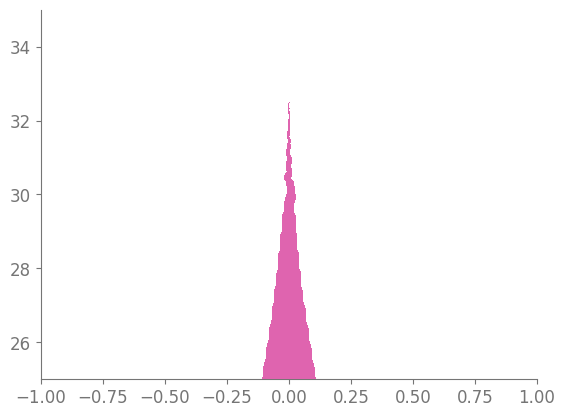

In [7]:
plt.tricontourf(nodes[:, 1], nodes[:, 2], els[:, 3:], sig_xy,
                levels=[-1,1], zorder=4, cmap="PuRd")
plt.xlim([-1,1])
plt.ylim([25,35])
plt.show()


Teniendo en cuenta que:

- $\sigma_{xz}$ esta entre -1 y 1.
- Las demas tensiones analizadas estan en un rango de (-900,80).

Es posible asumir que $\sigma_{xz}$=0.

### Círculo de Morh y Cálculo de $\tau_{max}$, $\sigma_{max}$ y $\sigma_{min}$

El radio es:

$$
R = \sqrt{\left(\frac{\sigma_{xx} -\sigma_{zz}}{2}\right)^{2} + \tau_{xz}^{2}} 
$$

El centro en $x$ es:

$$
C_x = \frac{\sigma_{xx} +\sigma_{zz}}{2}  
$$

In [8]:
import math

# Definir los casos
casos_se = [
    [[10, -200, 0],[-15, -5, 13],[-15, -5, -13]],
    [[0 , 0, 25],[-80, -10, 25],[80, 10, 25]],
    [[0 ,  1 , 60],[9, 3, -7],[1, -0.2, 0.5]],
    [[50 , -900, 0],[-100, -20, 70],[-30, -20, -50]]
]

# Listas para almacenar los valores de sig_1, sig_2, tau_max, C_x y R para cada caso
valores_sig_1 = []
valores_sig_2 = []
valores_tau_max = []
valores_C_x = []
valores_R = []

for i, casos_se in enumerate(casos_se, start=1):
    sig_1_caso = []
    sig_2_caso = []
    tau_max_caso = []
    C_x_caso = []
    R_caso = []
    for row in casos_se:
        R = math.sqrt(((row[0] - row[1]) / 2) ** 2 + row[2] ** 2)
        C_x = (row[0] + row[1]) / 2
        sig_1 = R - C_x
        sig_2 = R + C_x
        tau_max = R
        
        sig_1_caso.append(sig_1)
        sig_2_caso.append(sig_2)
        tau_max_caso.append(tau_max)
        C_x_caso.append(C_x)
        R_caso.append(R)
    
    # Almacenar los valores de sig_1, sig_2, tau_max, C_x y R para este caso
    valores_sig_1.append(sig_1_caso)
    valores_sig_2.append(sig_2_caso)
    valores_tau_max.append(tau_max_caso)
    valores_C_x.append(C_x_caso)
    valores_R.append(R_caso)

#Imprimir los valores almacenados para cada caso
# print("Valores de sig_1 para cada caso:", valores_sig_1)
# print("Valores de sig_2 para cada caso:", valores_sig_2)
# print("Valores de tau_max para cada caso:", valores_tau_max)
# print("Valores de C_x para cada caso:", valores_C_x)
# print("Valores de R para cada caso:", valores_R)

| Caso(posición) | Valores de $\sigma_{min}$ | Valores de $\sigma_{max}$ | Valores de $\tau_{max}$ | Valores de $C_{x}$ | Valores de $R$ |
|------|-------------------|-------------------|---------------------|----------------|--------------|
| 1 ($z$=5.0,$x$=0.0)   | 200.0 | 10.0 | 105.0 | -95.0 | 105.0 |
| 1 ($z$=5.0,$x$=7.0)   | 23.928 | 3.928 | 13.928 | -10.0 | 13.928 |
| 1 ($z$=5.0,$x$=-7.0)   | 23.928 | 3.928 | 13.928 | -10.0 | 13.928 |
| 2 ($z$=5.0,$x$=0.0)  | 25.0 | 25.0 | 25.0 | 0.0 | 25.0 |
| 2 ($z$=5.0,$x$=7.0)   | 88.012 | -1.988 | 43.012 | -45.0 | 43.012 |
| 2 ($z$=5.0,$x$=-7.0)   | -1.988 | 88.012 | 43.012 | 45.0 | 43.012 |
| 3 ($z$=5.0,$x$=0.0)  | 59.502 | 60.502 | 60.002 | 0.5 | 60.002 |
| 3 ($z$=5.0,$x$=7.0)   | 1.616 | 13.616 | 7.616 | 6.0 | 7.616 |
| 3 ($z$=5.0,$x$=-7.0)   | 0.381 | 1.181 | 0.781 | 0.4 | 0.781 |
| 4  ($z$=5.0,$x$=0.0)   | 900.0                         | 50.0                          | 475.0                         | -425.0               | 475.0                        |
|  4  ($z$=5.0,$x$=7.0)   | 140.6                         | 20.6                          | 80.6                          | -60.0                | 80.6                         |
|  4  ($z$=5.0,$x$=-7.0)   | 75.2                          | 25.2                          | 50.2                          | -25.0                | 50.2                         |


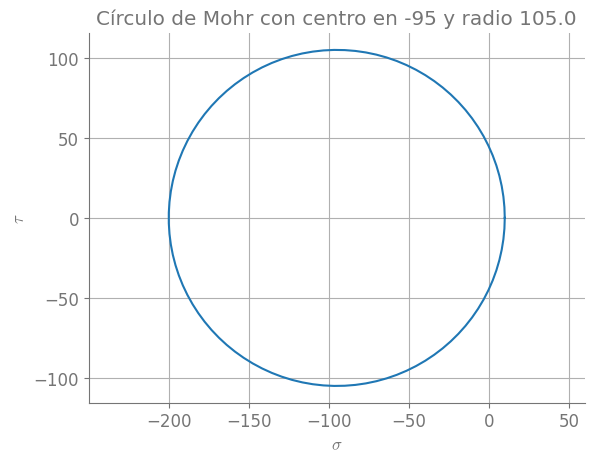

In [9]:
# Definir el centro y el radio del círculo
C_x = -95  # Por ejemplo
R = 105.0   # Por ejemplo

# Crear un conjunto de valores de ángulo para dibujar el círculo
theta = np.linspace(0, 2*np.pi, 100)

# Calcular las coordenadas (x, y) del círculo
x = C_x + R * np.cos(theta)
y = R * np.sin(theta)

# Graficar el círculo
plt.figure()
plt.plot(x, y)
plt.axis('equal')  # Para asegurarse de que los ejes tengan la misma escala
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\tau$')
plt.title('Círculo de Mohr con centro en {} y radio {}'.format(C_x, R))
plt.grid(True)
plt.show()

### Resultados de Análisis de Tensiones CON Estratos 

|($P$=1000.0, $V$=0.0 y $M$=0.0)| ($z$=5.0,$x$=0.0) | ($z$=5.0,$x$=7.0)| ($z$=5.0,$x$=-7.0)|
|------|-------------------|-------------------|-------------------|
|$\sigma_{xx}$ (Pa)| -10 | -10 | -10  |
|$\sigma_{zz}$ (Pa)| -2 | -220 | -2 |
|$\tau_{xz}$ (Pa)| 0 | 4 | -4 |
|($P$=0.0, $V$=1000.0 y $M$=0.0)|($z$=5.0,$x$=0.0) |($z$=5.0,$x$=7.0)|($z$=5.0,$x$=-7.0)| 
|$\sigma_{xx}$ (Pa)| 0 | -50 | 50 |
|$\sigma_{zz}$ (Pa)| 0 | -10 | 10 |
|$\tau_{xz}$ (Pa)| 60 | 25 | 25 |
|($P$=0.0, $V$=0.0  y $M$=1000.0)|($z$=5.0,$x$=0.0) | ($z$=5.0,$x$=7.0)|($z$=5.0,$x$=-7.0)| 
|$\sigma_{xx}$ (Pa)| 0  |  4 | 0.5  |
|$\sigma_{zz}$ (Pa)| 100  | 2 | -0.2  |
|$\tau_{xz}$ (Pa)| 50 | -0.1 | -2 |
|($P$=1000.0, $V$=1000.0  y $M$=1000.0)|($z$=5.0,$x$=0.0) | ($z$=5.0,$x$=7.0)|($z$=5.0,$x$=-7.0)| 
|$\sigma_{xx}$ (Pa)| -50 | -50 | -10 |
|$\sigma_{zz}$ (Pa)| -1000 | -10  |  -15 |
|$\tau_{xz}$ (Pa)| 0 | 10|-10 |

In [10]:
import math

# Definir los casos
casos_ce = [
    [[-10, -2, 0],[-10, -220, 4],[-10, -2, -4]],
    [[0 , 0, 60],[-50, 10, 25],[50, 10, 25]],
    [[0 ,  100 , 500],[4, 2, -0.1],[0.5, -0.2, -2]],
    [[-50 ,  -50 , -10],[-1000, -10, -15],[0, 10, -10]]
]

# Listas para almacenar los valores de sig_1, sig_2, tau_max, C_x y R para cada caso
valores_sig_1 = []
valores_sig_2 = []
valores_tau_max = []
valores_C_x = []
valores_R = []

for i, caso_ce in enumerate(casos_ce, start=1):
    sig_1_caso = []
    sig_2_caso = []
    tau_max_caso = []
    C_x_caso = []
    R_caso = []
    for row in caso_ce:
        R = math.sqrt(((row[0] - row[1]) / 2) ** 2 + row[2] ** 2)
        C_x = (row[0] + row[1]) / 2
        sig_1 = R - C_x
        sig_2 = R + C_x
        tau_max = R
        
        sig_1_caso.append(sig_1)
        sig_2_caso.append(sig_2)
        tau_max_caso.append(tau_max)
        C_x_caso.append(C_x)
        R_caso.append(R)
    
    # Almacenar los valores de sig_1, sig_2, tau_max, C_x y R para este caso
    valores_sig_1.append(sig_1_caso)
    valores_sig_2.append(sig_2_caso)
    valores_tau_max.append(tau_max_caso)
    valores_C_x.append(C_x_caso)
    valores_R.append(R_caso)

#Imprimir los valores almacenados para cada caso
# print("Valores de sig_1 para cada caso:", valores_sig_1)
# print("Valores de sig_2 para cada caso:", valores_sig_2)
# print("Valores de tau_max para cada caso:", valores_tau_max)
# print("Valores de C_x para cada caso:", valores_C_x)
# print("Valores de R para cada caso:", valores_R)

| Caso (posición) | Valores de $\sigma_{min}$ | Valores de $\sigma_{max}$ | Valores de $\tau_{max}$ | Valores de $C_x$ | Valores de $R$ |
|------|-------------------|-------------------|---------------------|----------------|--------------|
| 1($z$=5.0,$x$=0.0)| 10.0 | -2.0 | 4.0 | -6.0 | 4.0 |
| 1($z$=5.0,$x$=7.0) | 220.076 | -9.924 | 105.076 | -115.0 | 105.076 |
| 1($z$=5.0,$x$=-7.0)| 11.657 | -0.343 | 5.657 | -6.0 | 5.657 |
| 2($z$=5.0,$x$=0.0)| 60.0 | 60.0 | 60.0 | 0.0 | 60.0 |
| 2($z$=5.0,$x$=7.0)| 59.051 | 19.051 | 39.051 | -20.0 | 39.051 |
| 2 ($z$=5.0,$x$=-7.0) | 2.016 | 62.016 | 32.016 | 30.0 | 32.016 |
| 3($z$=5.0,$x$=0.0)| 452.494 | 552.494 | 502.494 | 50.0 | 502.494 |
| 3($z$=5.0,$x$=7.0)| -1.995 | 4.005 | 1.005 | 3.0 | 1.005 |
| 3($z$=5.0,$x$=-7.0)| 1.880 | 2.180 | 2.030 | 0.15 | 2.030 |
| 4 ($z$=5.0,$x$=7.0)    | 60.0                           | -40.0                          | 10.0                           | -50.0               | 10.0                        |
|  4 ($z$=5.0,$x$=0.0)    | 1000.2                         | -9.8                           | 495.2                          | -505.0              | 495.2                       |
|   4 ($z$=5.0,$x$=-7.0)   | 6.2                            | 16.2                           | 11.2                           | 5.0                 | 11.2                        |


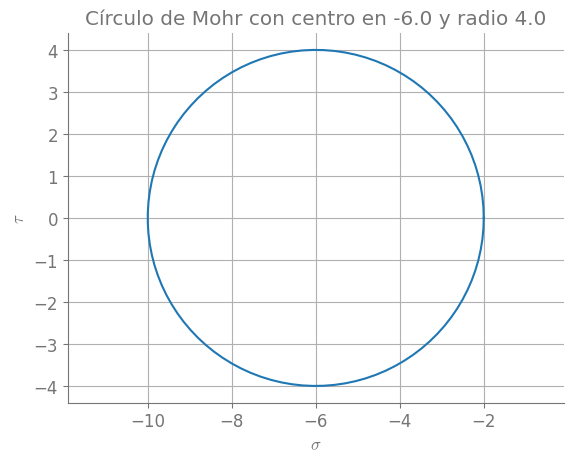

In [11]:
# Definir el centro y el radio del círculo
C_x = -6.0  # Por ejemplo
R = 4.0   # Por ejemplo

# Crear un conjunto de valores de ángulo para dibujar el círculo
theta = np.linspace(0, 2*np.pi, 100)

# Calcular las coordenadas (x, y) del círculo
x = C_x + R * np.cos(theta)
y = R * np.sin(theta)

# Graficar el círculo
plt.figure()
plt.plot(x, y)
plt.axis('equal')  # Para asegurarse de que los ejes tengan la misma escala
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\tau$')
plt.title('Círculo de Mohr con centro en {} y radio {}'.format(C_x, R))
plt.grid(True)
plt.show()

### Comparación del Efecto de los Estratos

Se genera el mapa de tensión para uno de los casos de estudio sin el efecto de los estratos.

In [12]:
"""
Elegir cargas Veticales y Horizontales
"""
P1 = -500.0 # Carga Vertical 1 (zapata parte izquierda)
P2 = -500.0 # Carga Vertical 2 (zapata parte derecha)
V1 = 0.0 # Carga Horizontal 1 (zapata parte izquierda)
V2 = 0.0 # Carga Horizontal 2 (zapata parte derecha)
"""
Elegir modelo (0, 1 y 2)
"""
id_model = 0   # (0): Zapata (1): 1 pilote (2): 2 pilotes   
"""
Elegir estrato (0 y 1)
"""
id_estrato = 0   # (0): Sin estratos (1): Con estratos    
"""
Correr modelo de Zapata
"""
nodes, mats, elements, loads,\
UG, UC, S_nodes, E_nodes, eles = modelos(P1,P2,V1,V2,id_model,id_estrato) 
"""
Extracción de tensiones 
"""
sig_x_se  = S_nodes[: , 0] # Tensión normal horizontal (sig_x) 
sig_y_se  = S_nodes[: , 1] # Tensión normal vertical (sig_y) 
sig_xy_se = S_nodes[: , 2] # Tensión cortante (sig_xy) 
els = np.vstack((eles[1],# Semi-espacio
                 eles[2],# Estrato 5 completo
                 eles[3],# Estrato 4 completo
                 eles[4],# Estrato 3 completo
                 eles[5],# Estrato 2 completo
                 eles[6],# Estrato 1 completo
                 eles[7]))# Zapata

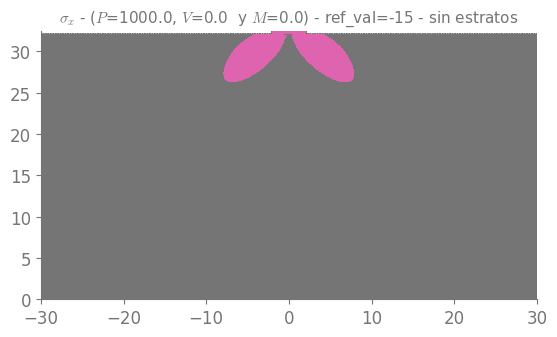

In [13]:
"""
Gráfica de contorno filtrada en ref_val.
"""
ref_val=-15 # Eligiendo valor de referencia.
aux.filtered(nodes, els , sig_x_se,ref_val)#Generando gráfica.
plt.title(r"$\sigma_{x}$ - ($P$=1000.0, $V$=0.0  y $M$=0.0) - ref_val=-15 - sin estratos", fontsize=11)  # Añadiendo título de gráfica.
#plt.savefig("img/tarea_1/3_3_tau_xy_se_ref_val2.png")  # Guardar la figura.
plt.show() 

Se genera el mismo mapa pero cambiando los parametros de los estratos.

In [14]:
"""
Elegir cargas Veticales y Horizontales
"""
P1 = -500.0 # Carga Vertical 1 (zapata parte izquierda)
P2 = -500.0 # Carga Vertical 2 (zapata parte derecha)
V1 = 0.0 # Carga Horizontal 1 (zapata parte izquierda)
V2 = 0.0 # Carga Horizontal 2 (zapata parte derecha)
"""
Elegir modelo (0, 1 y 2)
"""
id_model = 0   # (0): Zapata (1): 1 pilote (2): 2 pilotes   
"""
Elegir estrato (0 y 1)
"""
id_estrato = 1   # (0): Sin estratos (1): Con estratos    
"""
Correr modelo de Zapata
"""
nodes, mats, elements, loads,\
UG, UC, S_nodes, E_nodes, eles = modelos(P1,P2,V1,V2,id_model,id_estrato) 
"""
Extracción de tensiones 
"""
sig_x_ce  = S_nodes[: , 0] # Tensión normal horizontal (sig_x) 
sig_y_ce  = S_nodes[: , 1] # Tensión normal vertical (sig_y) 
sig_xy_ce = S_nodes[: , 2] # Tensión cortante (sig_xy) 
els_ce = np.vstack((eles[1],# Semi-espacio
                 eles[2],# Estrato 5 completo
                 eles[3],# Estrato 4 completo
                 eles[4],# Estrato 3 completo
                 eles[5],# Estrato 2 completo
                 eles[6],# Estrato 1 completo
                 eles[7]))# Zapata

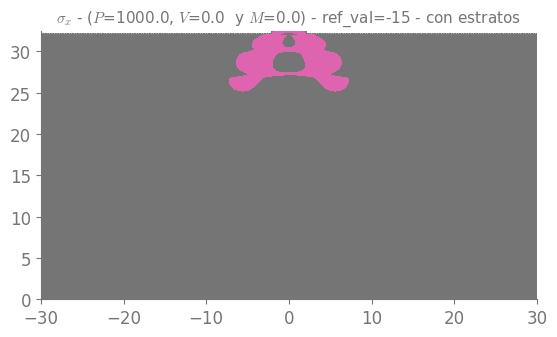

In [15]:
"""
Gráfica de contorno filtrada en ref_val.
"""
ref_val=-15 # Eligiendo valor de referencia.
aux.filtered(nodes, els , sig_x_ce,ref_val)#Generando gráfica.
plt.title(r"$\sigma_{x}$ - ($P$=1000.0, $V$=0.0  y $M$=0.0) - ref_val=-15 - con estratos", fontsize=11)  # Añadiendo título de gráfica.
#plt.savefig("img/tarea_1/3_3_tau_xy_ce_ref_val2.png")  # Guardar la figura.
plt.show() 

**Caso 1**

<center>
    <img src="img/tarea_1/1_1_sig_x_se_ref_val-15.png"
         alt="Comparación de estratos."
         style="width:500px">
    <img src="img/tarea_1/1_1_sig_x_ce_ref_val-15.png"
         alt="Comparación de estratos."
         style="width:500px">    
  
</center>

**Caso 2**

<center>
    <img src="img/tarea_1/2_1_sig_x_se_ref_val-30.png"
         alt="Comparación de estratos."
         style="width:500px">
    <img src="img/tarea_1/2_1_sig_x_ce_ref_val-30.png"
         alt="Comparación de estratos."
         style="width:500px">    
</center>

**Caso 3**

<center>
    <img src="img/tarea_1/3_1_sig_x_se_ref_val6.png"
         alt="Comparación de estratos."
         style="width:500px">
    <img src="img/tarea_1/3_1_sig_x_ce_ref_val6.png"
         alt="Comparación de estratos."
         style="width:500px">    
</center>

### Dar estilo al texto de Markdown

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open('estilo.css', 'r').read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'estilo.css'